In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gradio as gr
df=pd.read_csv("Customers Transactions.zip")
df

,customer_id,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,feedback_text,last_purchase_date
0,1,37,Male,Germany,85886,14,18,41.20,6,20,0.95,0,Very satisfied with my purchase.,2025-06-22
1,2,40,Male,India,41041,4,10,31.73,4,29,0.21,0,Good quality and value for money.,2025-10-17
2,3,69,Female,Australia,143869,59,39,65.96,12,26,0.08,0,Excellent customer service.,2025-07-01
3,4,30,Male,UK,87261,45,34,51.87,12,7,0.61,0,Good quality and value for money.,2025-08-17
4,5,69,Female,UK,110678,40,38,59.64,13,16,0.49,0,Excellent customer service.,2025-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,39,Female,France,45002,39,13,45.50,4,28,0.75,0,Excellent customer service.,2025-08-06
9996,9997,44,Male,USA,95367,86,41,54.22,13,17,0.19,0,"Great experience, will shop again!",2025-08-15
9997,9998,25,Female,USA,73884,33,17,49.58,4,1,0.71,0,Love the products and fast shipping.,2025-10-26
9998,9999,19,Female,USA,80849,85,12,49.20,0,18,0.33,0,Excellent customer service.,2025-09-16


In [2]:
df.head()

,customer_id,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,feedback_text,last_purchase_date
0,1,37,Male,Germany,85886,14,18,41.20,6,20,0.95,0,Very satisfied with my purchase.,2025-06-22
1,2,40,Male,India,41041,4,10,31.73,4,29,0.21,0,Good quality and value for money.,2025-10-17
2,3,69,Female,Australia,143869,59,39,65.96,12,26,0.08,0,Excellent customer service.,2025-07-01
3,4,30,Male,UK,87261,45,34,51.87,12,7,0.61,0,Good quality and value for money.,2025-08-17
4,5,69,Female,UK,110678,40,38,59.64,13,16,0.49,0,Excellent customer service.,2025-06-21


In [3]:
df.tail()

,customer_id,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,feedback_text,last_purchase_date
9995,9996,39,Female,France,45002,39,13,45.50,4,28,0.75,0,Excellent customer service.,2025-08-06
9996,9997,44,Male,USA,95367,86,41,54.22,13,17,0.19,0,"Great experience, will shop again!",2025-08-15
9997,9998,25,Female,USA,73884,33,17,49.58,4,1,0.71,0,Love the products and fast shipping.,2025-10-26
9998,9999,19,Female,USA,80849,85,12,49.20,0,18,0.33,0,Excellent customer service.,2025-09-16
9999,10000,66,Male,India,75854,60,24,54.60,6,12,0.67,0,Excellent customer service.,2025-06-15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   age                       10000 non-null  int64  
 2   gender                    10000 non-null  object 
 3   country                   10000 non-null  object 
 4   annual_income             10000 non-null  int64  
 5   spending_score            10000 non-null  int64  
 6   num_purchases             10000 non-null  int64  
 7   avg_purchase_value        10000 non-null  float64
 8   membership_years          10000 non-null  int64  
 9   website_visits_per_month  10000 non-null  int64  
 10  cart_abandon_rate         10000 non-null  float64
 11  churned                   10000 non-null  int64  
 12  feedback_text             10000 non-null  object 
 13  last_purchase_date        10000 non-null  object 
dtypes: floa

In [5]:
df.isnull().sum()

customer_id                 0
age                         0
gender                      0
country                     0
annual_income               0
spending_score              0
num_purchases               0
avg_purchase_value          0
membership_years            0
website_visits_per_month    0
cart_abandon_rate           0
churned                     0
feedback_text               0
last_purchase_date          0
dtype: int64

In [6]:
df.describe()

,customer_id,age,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,44.045800,86067.676100,50.924200,22.576000,47.447480,6.340500,15.578100,0.501216,0.109000
std,2886.89568,15.404669,38986.787991,28.753395,10.163639,11.205902,4.680657,8.655322,0.286836,0.311655
min,1.00000,18.000000,20028.000000,1.000000,1.000000,16.750000,0.000000,1.000000,0.000000,0.000000
25%,2500.75000,31.000000,55345.500000,26.000000,14.000000,39.500000,2.000000,8.000000,0.250000,0.000000
50%,5000.50000,44.000000,78339.500000,51.000000,22.000000,46.990000,6.000000,16.000000,0.510000,0.000000
75%,7500.25000,57.000000,115570.500000,75.000000,31.000000,55.080000,10.000000,23.000000,0.750000,0.000000
max,10000.00000,70.000000,179960.000000,100.000000,49.000000,83.270000,15.000000,30.000000,1.000000,1.000000


In [7]:
df['churned'].value_counts()

churned
0    8910
1    1090
Name: count, dtype: int64

In [8]:
df.drop(['customer_id','feedback_text','last_purchase_date'],axis=1,inplace=True,errors='ignore')
df

,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned
0,37,Male,Germany,85886,14,18,41.20,6,20,0.95,0
1,40,Male,India,41041,4,10,31.73,4,29,0.21,0
2,69,Female,Australia,143869,59,39,65.96,12,26,0.08,0
3,30,Male,UK,87261,45,34,51.87,12,7,0.61,0
4,69,Female,UK,110678,40,38,59.64,13,16,0.49,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,39,Female,France,45002,39,13,45.50,4,28,0.75,0
9996,44,Male,USA,95367,86,41,54.22,13,17,0.19,0
9997,25,Female,USA,73884,33,17,49.58,4,1,0.71,0
9998,19,Female,USA,80849,85,12,49.20,0,18,0.33,0


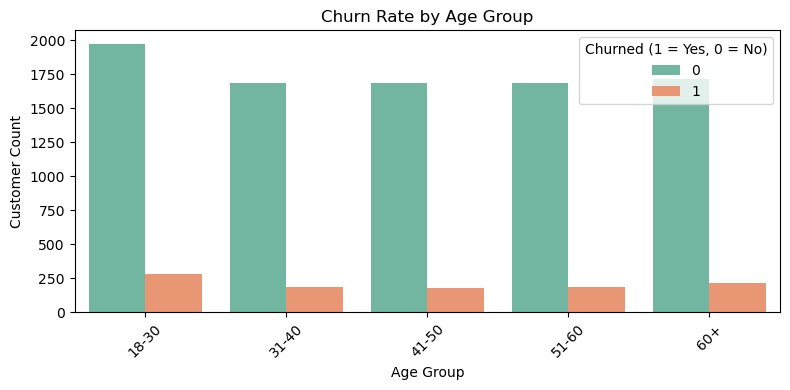

In [9]:
df['AgeGroup'] = pd.cut(df['age'],
                        bins=[18, 30, 40, 50, 60, 100],
                        labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Plot Churn Rate by Age Group
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='AgeGroup', hue='churned', palette='Set2',
              order=['18-30','31-40','41-50','51-60','60+'])
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Customer Count")
plt.legend(title='Churned (1 = Yes, 0 = No)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15752\1074652525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y='membership_years', palette='coolwarm')


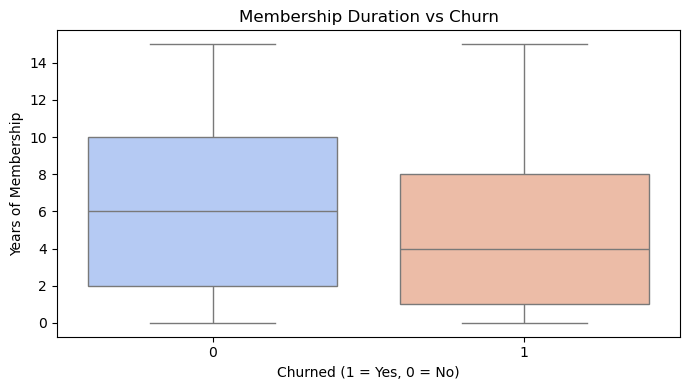

In [10]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='churned', y='membership_years', palette='coolwarm')
plt.title("Membership Duration vs Churn")
plt.xlabel("Churned (1 = Yes, 0 = No)")
plt.ylabel("Years of Membership")
plt.tight_layout()
plt.show()

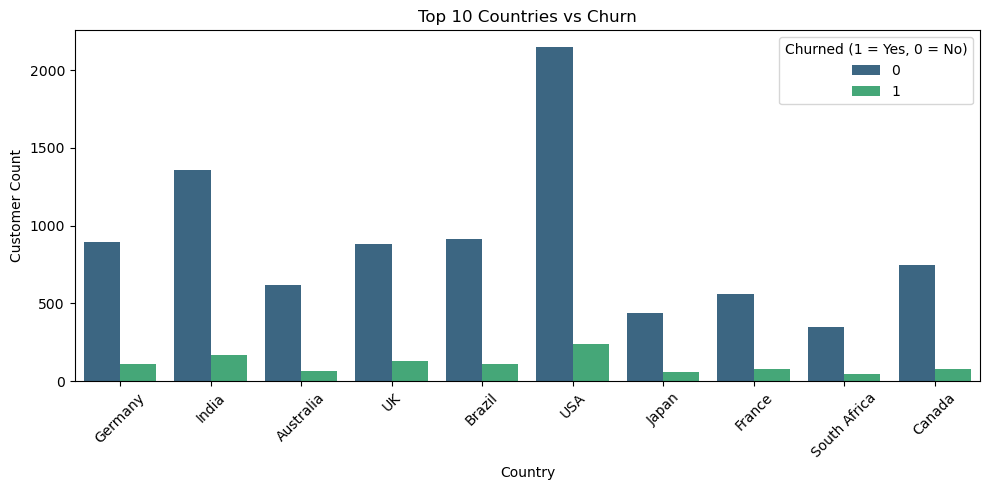

In [11]:
top_countries = df['country'].value_counts().nlargest(10).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(10, 5))
sns.countplot(data=df_top, x='country', hue='churned', palette='viridis')
plt.title("Top 10 Countries vs Churn")
plt.xlabel("Country")
plt.ylabel("Customer Count")
plt.legend(title="Churned (1 = Yes, 0 = No)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15752\724468175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y='num_purchases', palette='mako')


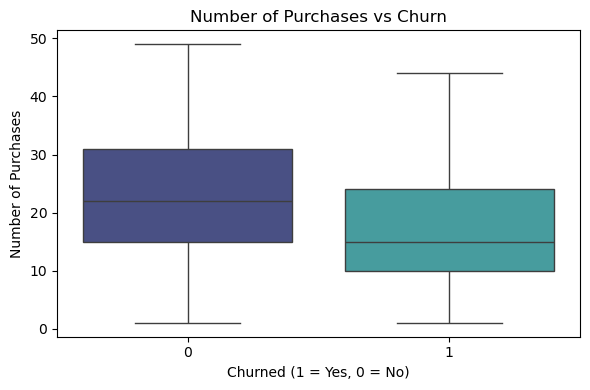

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='churned', y='num_purchases', palette='mako')
plt.title("Number of Purchases vs Churn")
plt.xlabel("Churned (1 = Yes, 0 = No)")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3903847928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churned', palette='pastel')


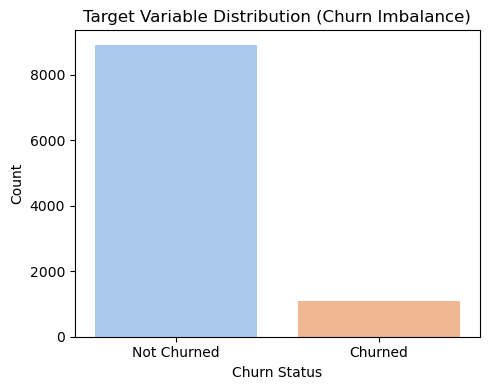

In [13]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='churned', palette='pastel')
plt.title("Target Variable Distribution (Churn Imbalance)")
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

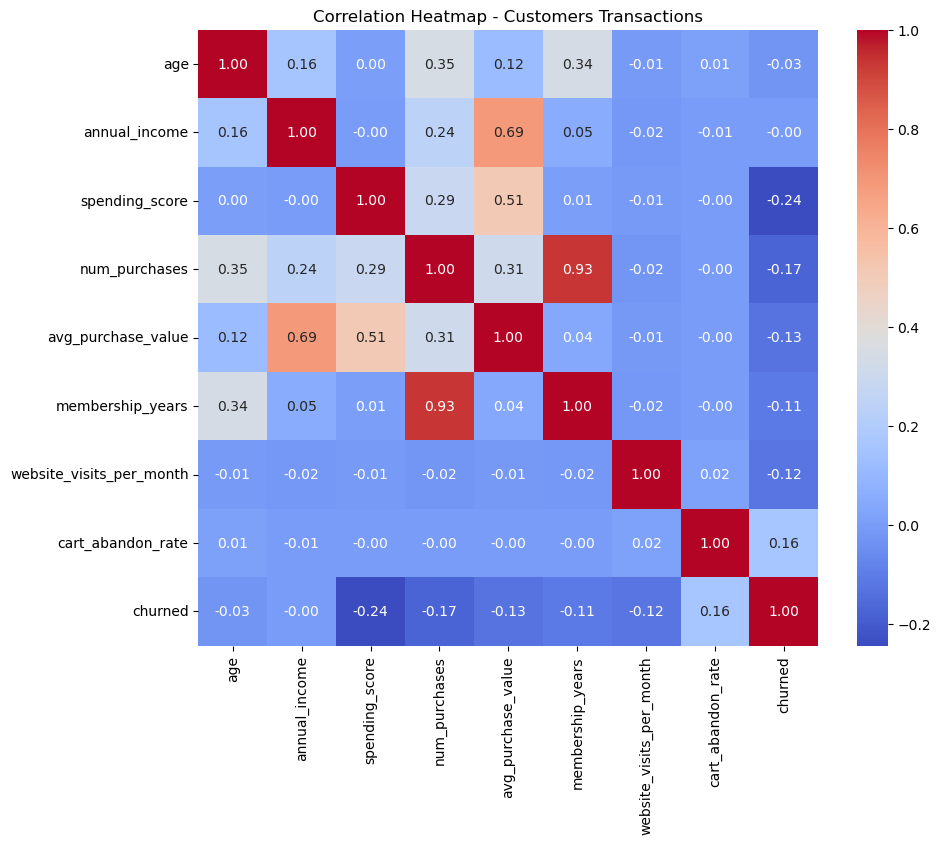

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(['number']).corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Customers Transactions",fontsize=12)
plt.show()

In [15]:
le=LabelEncoder()
le1=LabelEncoder()
le2=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['country']=le1.fit_transform(df['country'])
df['AgeGroup']=le2.fit_transform(df['AgeGroup'])
df

,age,gender,country,annual_income,spending_score,num_purchases,avg_purchase_value,membership_years,website_visits_per_month,cart_abandon_rate,churned,AgeGroup
0,37,1,4,85886,14,18,41.20,6,20,0.95,0,1
1,40,1,5,41041,4,10,31.73,4,29,0.21,0,1
2,69,0,0,143869,59,39,65.96,12,26,0.08,0,4
3,30,1,8,87261,45,34,51.87,12,7,0.61,0,0
4,69,0,8,110678,40,38,59.64,13,16,0.49,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,0,3,45002,39,13,45.50,4,28,0.75,0,1
9996,44,1,9,95367,86,41,54.22,13,17,0.19,0,2
9997,25,0,9,73884,33,17,49.58,4,1,0.71,0,0
9998,19,0,9,80849,85,12,49.20,0,18,0.33,0,0


In [16]:
x = df.drop(columns=['churned'])
y = df['churned']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [17]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
y_pred=lg.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Logistic Regression Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1775
           1       0.58      0.08      0.15       225

    accuracy                           0.89      2000
   macro avg       0.74      0.54      0.54      2000
weighted avg       0.86      0.89      0.85      2000

[[1761   14]
 [ 206   19]]


In [19]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("Random Forest Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Random Forest Accuracy: 0.884
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1775
           1       0.41      0.07      0.12       225

    accuracy                           0.88      2000
   macro avg       0.65      0.53      0.53      2000
weighted avg       0.84      0.88      0.85      2000

[[1752   23]
 [ 209   16]]


In [21]:
xgb=XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=3,random_state=42)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

print("XGBoost Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

XGBoost Accuracy: 0.887
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1775
           1       0.49      0.08      0.14       225

    accuracy                           0.89      2000
   macro avg       0.69      0.54      0.54      2000
weighted avg       0.85      0.89      0.85      2000

[[1755   20]
 [ 206   19]]


In [22]:
train_pred_lg = model.predict(x_train)
ytest_pred_lg = model.predict(x_test)

ytrain_pred_rf = model.predict(x_train)
ytest_pred_rf = model.predict(x_test)

ytrain_pred_xgb = xgb.predict(x_train)
ytest_pred_xgb = xgb.predict(x_test)

# Accuracy calculation
lg_train = accuracy_score(y_train, train_pred_lg)
lg_test = accuracy_score(y_test, ytest_pred_lg)

rf_train = accuracy_score(y_train, ytrain_pred_rf)
rf_test = accuracy_score(y_test, ytest_pred_rf)

xgb_train = accuracy_score(y_train, ytrain_pred_xgb)
xgb_test = accuracy_score(y_test, ytest_pred_xgb)

# Combine results
score = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'XGBoostClassifier'],
    'TrainingScore': [lg_train, rf_train, xgb_train],
    'TestingScore': [lg_test, rf_test, xgb_test]
})

score

,Model,TrainingScore,TestingScore
0,LogisticRegression,1.000000,0.887
1,RandomForestClassifier,1.000000,0.887
2,XGBoostClassifier,0.903125,0.887


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Calculate metrics for each model
comparison_table = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    
    "Accuracy": [
        accuracy_score(y_test, y_pred_lg),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    
    "Precision": [
        precision_score(y_test, y_pred_lg),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    
    "Recall": [
        recall_score(y_test, y_pred_lg),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    
    "F1 Score": [
        f1_score(y_test, y_pred_lg),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}
df_comparison = pd.DataFrame(comparison_table)
print(df_comparison.to_string(index=False))

NameError: name 'y_pred_lg' is not defined

In [ ]:
churn_counts = df['churned'].value_counts()

plt.figure(figsize=(6,5))
plt.bar(churn_counts.index.astype(str), churn_counts.values)
plt.title("Churn Distribution")
plt.xlabel("churned")
plt.ylabel("Count")
plt.show()

In [ ]:
gender_churn = df.groupby('gender')['churned'].value_counts().unstack()

plt.figure(figsize=(6,5))
gender_churn.plot(kind='bar')
plt.title("Gender vs Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

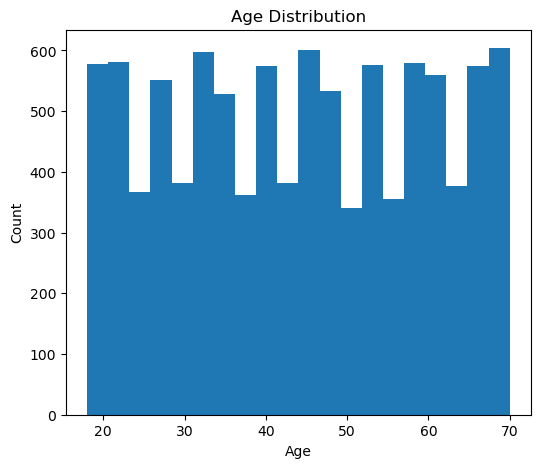

In [24]:
# Age Distribution
plt.figure(figsize=(6,5))
plt.hist(df['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [25]:
 # Income Distribution
# plt.figure(figsize=(6,5))
# plt.hist(df['annual_income'], bins=20)
# plt.title("Annual Income Distribution")
# plt.xlabel("Annual Income")
# plt.ylabel("Frequency")
# plt.show()

In [26]:
# Spending Score Boxplot
# plt.figure(figsize=(5,5))
# plt.boxplot(df['spending_score'])
# plt.title("Spending Score Spread")
# plt.ylabel("Spending Score")
# plt.show()

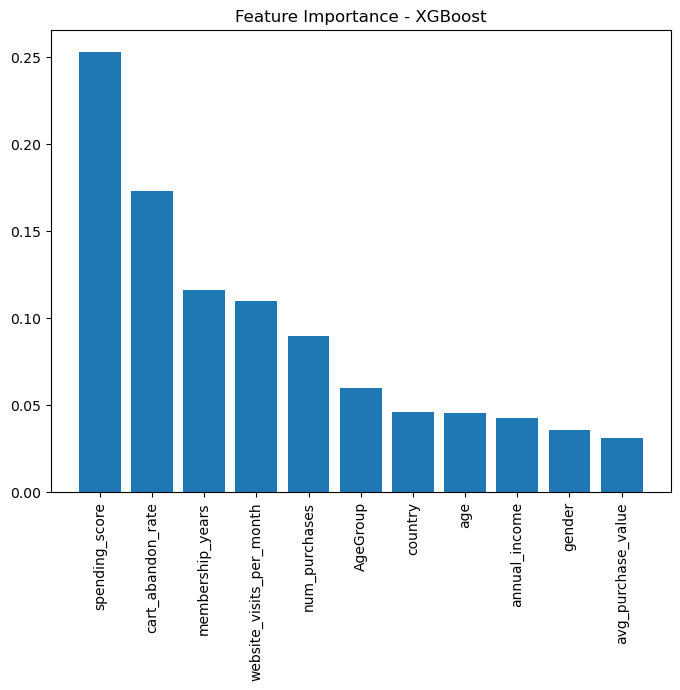

In [27]:
importance = xgb.feature_importances_
indices = np.argsort(importance)[::-1]
features = x.columns

plt.figure(figsize=(8,6))
plt.bar(range(len(features)), importance[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.title("Feature Importance - XGBoost")
plt.show()


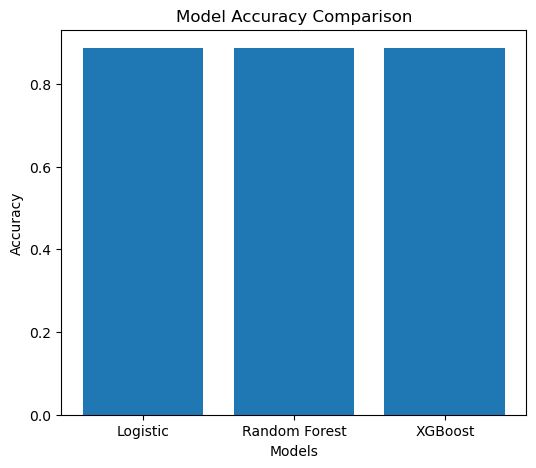

In [28]:
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred)
]

model_names = ["Logistic", "Random Forest", "XGBoost"]

plt.figure(figsize=(6,5))
plt.bar(model_names, accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

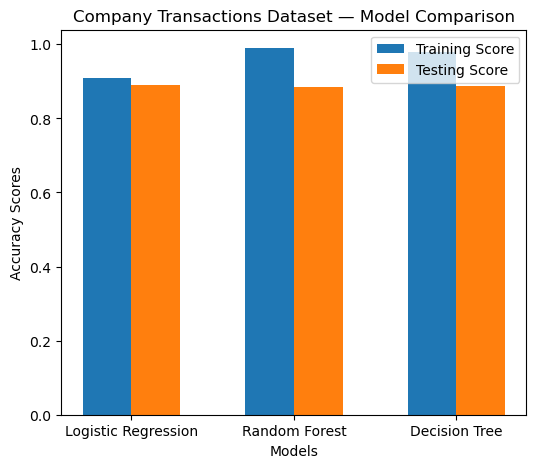

In [29]:
score = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'TrainingScore': [0.91,0.99,0.98],  # your training accuracies
    'TestingScore': [0.89,0.884,0.887]    # your test accuracies
})

%matplotlib inline
x = score.Model
y = score.TrainingScore
z = score.TestingScore

width = 0.3
x_indices = np.arange(len(x))
plt.figure(figsize=(6,5))
plt.bar(x_indices - width / 2, y, width=width, label='Training Score')
plt.bar(x_indices + width / 2, z, width=width, label='Testing Score')

plt.xticks(x_indices, x)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Company Transactions Dataset — Model Comparison')
plt.legend()
plt.show()

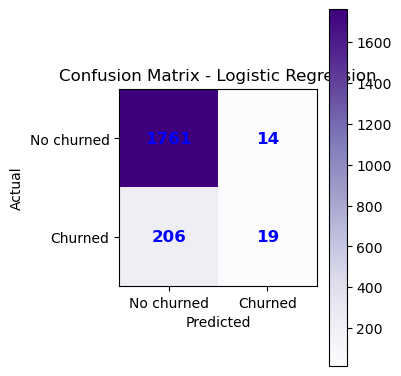

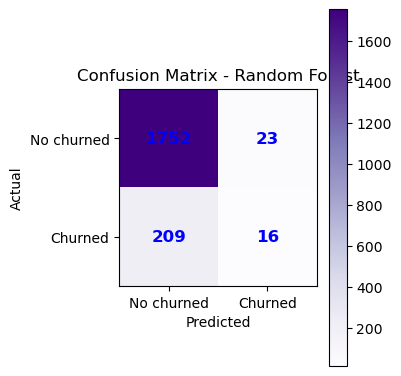

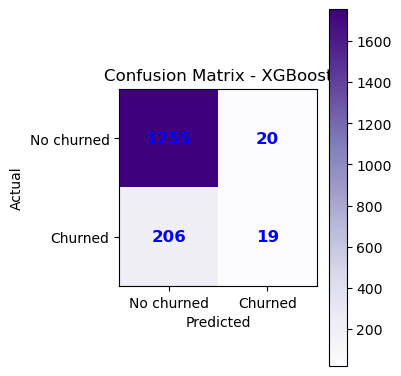

In [30]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest',cmap='Purples')
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['No churned', 'Churned'])
    plt.yticks(tick_marks, ['No churned', 'Churned'])
    
    # Display cell values
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha='center', va='center', color="blue", fontsize=12, fontweight="bold")
            
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Predictions from each model
y_pred_lg  = lg.predict(x_test)     # Logistic Regression
y_pred_rf  = rf.predict(x_test)    # Random Forest
y_pred_xgb = xgb.predict(x_test)   # XGBoost

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_lg,  "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf,  "Confusion Matrix - Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix - XGBoost")


In [31]:
def predict_churn(gender, country, age_group, annual_income, spending_score, num_purchases, avg_purchase_value):

    try:
        gender_encoded = le_gender.transform([gender])[0]
        country_encoded = le_country.transform([country])[0]
        # age_encoded = le_age.transform([age_group])[0]
    except ValueError:
        return "Enter valid gender and country  from dataset."
        # "Please enter valid values from dataset."

        pred=model.predict([[gender_encoded, country_encoded,age_encoded,
                            annual_income, spending_score, num_purchases, avg_purchase_value]])[0]
        return f"{result}\nChurn Probability: {prob:.2f}"
# simple gradio interface
iface=gr.Interface(
     fn=predict_churn,
    inputs=[
        gr.Textbox(label="Gender (example: Male / Female)"),
        gr.Textbox(label="Country (example: India / USA / France)"),
        gr.Textbox(label="Age Group (example: Adult / Senior / Young)"),
        gr.Number(label="Annual Income"),
        gr.Number(label="Spending Score"),
        gr.Number(label="Number of Purchases"),
        gr.Number(label="Average Purchase Value"),
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Customer Churn Prediction (Logistic Regression)",
    description="Enter customer details to predict churn using Logistic Regression."
)
iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
